[The Human Mortality Database](https://www.mortality.org/hmd/RUS/STATS/E0per.txt) *(mortality.org)*<br />
[ЕМИСС](https://www.fedstat.ru/indicator/31293) - Единая межведомственная информационно-статистическая система) *(fedstat.ru)*<br />
"[Продолжительность жизни в субъектах Российской Федерации](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_субъектах_Российской_Федерации)" *(wiki)*<br />
[Файл:Ожидаемая продолжительность жизни, Россия, 1990-2009.png](https://ru.wikipedia.org/wiki/Файл:Ожидаемая_продолжительность_жизни,_Россия,_1990-2009.png) *в русскоязычной Википедии*<br />
[Category:Life expectancy charts for Russia](https://commons.wikimedia.org/wiki/Category:Life_expectancy_charts_for_Russia) *на Викискладе*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [3]:
# load info for Russia
df_rus = pd.read_csv('data/HMD_Russia.csv', sep='\t', index_col='year')
df_rus = df_rus[['females', 'overall', 'males']] \
             .rename(columns={
                 'females': 'rus_f',
                 'males': 'rus_m',
                 'overall': 'rus_o'
             })
df_rus.index.name = ''

print(df_rus.shape)
df_rus.tail(2)

(56, 3)


,rus_f,rus_o,rus_m
,,,
2013,76.29,70.75,65.10
2014,76.48,70.92,65.26


In [4]:
# load info for Ukraine
df_ukr = pd.read_csv('data/HMD_Ukraine.csv', sep='\t', index_col='year')
df_ukr = df_ukr[['females', 'overall', 'males']] \
             .rename(columns={
                 'females': 'ukr_f',
                 'males': 'ukr_m',
                 'overall': 'ukr_o'
             })
df_ukr.index.name = ''

print(df_ukr.shape)
df_ukr.tail(2)

(55, 3)


,ukr_f,ukr_o,ukr_m
,,,
2012,75.99,71.13,66.07
2013,76.20,71.35,66.31


In [5]:
df = pd.concat([df_rus.loc[:2013], df_ukr.loc[:2013]], axis='columns')
df

,rus_f,rus_o,rus_m,ukr_f,ukr_o,ukr_m
,,,,,,
1959,71.16,67.69,62.85,72.20,69.45,65.78
1960,72.31,68.70,63.67,73.80,71.08,67.39
1961,72.62,68.96,63.90,74.15,71.37,67.63
1962,72.27,68.64,63.68,73.52,70.78,67.11
1963,72.78,69.13,64.13,74.24,71.42,67.65
1964,73.58,69.92,64.89,75.03,72.22,68.45
1965,73.31,69.50,64.36,74.60,71.69,67.82
1966,73.55,69.57,64.28,74.99,71.95,67.94
1967,73.43,69.35,64.02,74.64,71.55,67.52


In [6]:
dd_to_eng = {'ukr_f': 'Ukraine -females',
             'ukr_o': 'Ukraine -overall',
             'ukr_m': 'Ukraine -males',
             'rus_f': 'Russia -females',
             'rus_o': 'Russia -overall',
             'rus_m': 'Russia -males'}

dd_to_rus = {'ukr_f': 'Украина -женщины',
             'ukr_o': 'Украина -общая',
             'ukr_m': 'Украина -мужчины',
             'rus_f': 'Россия -женщины',
             'rus_o': 'Россия -общая',
             'rus_m': 'Россия -мужчины'}

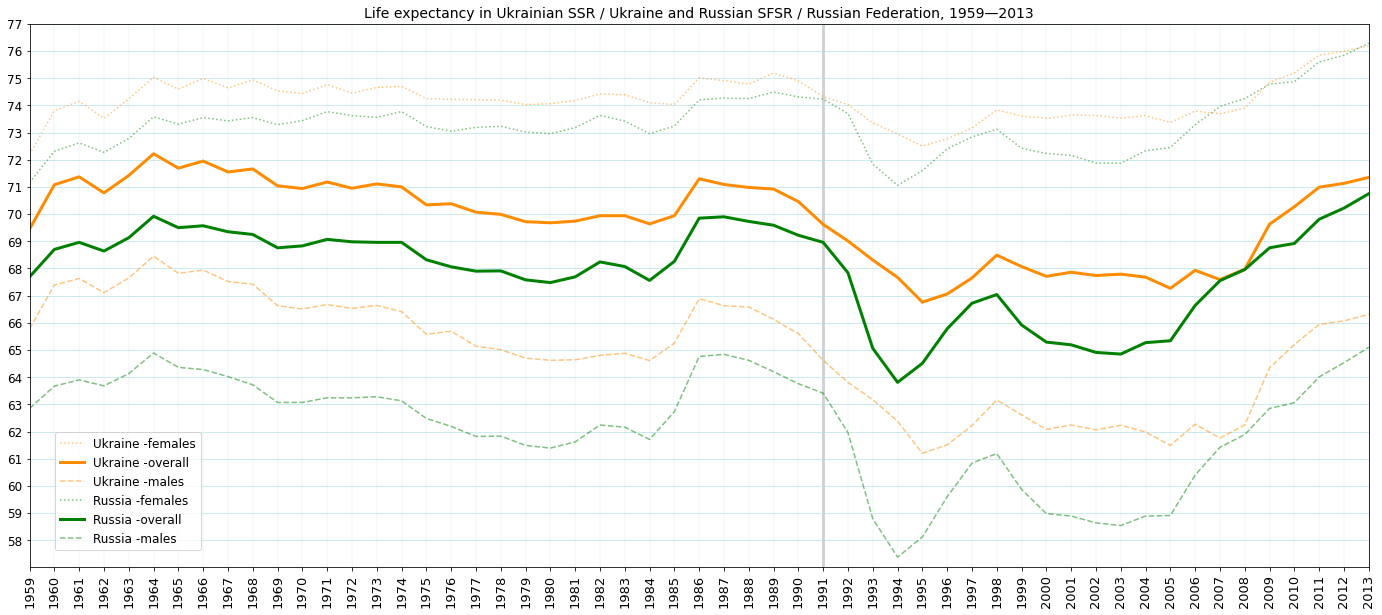

In [7]:
# Graph for the whole period
plt.rcParams['figure.figsize'] = (24, 10)

year_min = df.index[0]
year_max = df.index[-1]

plt.title('Life expectancy in Ukrainian SSR / Ukraine and Russian SFSR / Russian Federation, 1959—2013', fontsize=14)

for row_name, color_line in zip(['ukr', 'rus'],
                                ['darkorange', 'green']):
    plt.plot(df.index, df[row_name+'_f'], linestyle=':', color=color_line, linewidth=1.5, label=dd_to_eng[row_name+'_f'], alpha=0.5)
    plt.plot(df.index, df[row_name+'_o'], linestyle='-', color=color_line, linewidth=3, label=dd_to_eng[row_name+'_o'])
    plt.plot(df.index, df[row_name+'_m'], linestyle='--', color=color_line, linewidth=1.5, label=dd_to_eng[row_name+'_m'], alpha=0.5)

plt.axvline(x=1991, color='lightgrey', linewidth=3, zorder=0)

plt.xlim(year_min, year_max)
plt.grid(axis='x', color='powderblue', linewidth=0.4, alpha=0.6)
plt.grid(axis='y', color='powderblue', linewidth=0.8, alpha=0.8)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 78)
plt.ylim(57, 77)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc=(0.019, 0.032), fontsize=12)
plt.show()

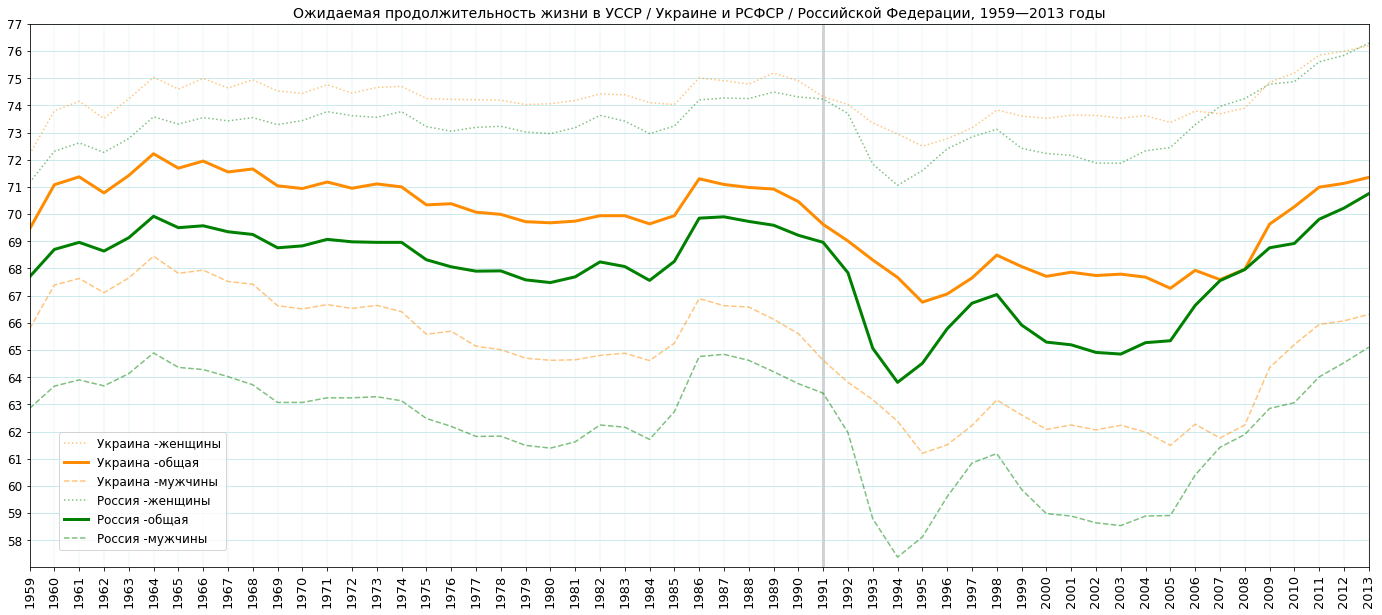

In [8]:
# Russian version of the graph for the whole period
plt.title('Ожидаемая продолжительность жизни в УССР / Украине и РСФСР / Российской Федерации, 1959—2013 годы', fontsize=14)

for row_name, color_line in zip(['ukr', 'rus'],
                                ['darkorange', 'green']):
    plt.plot(df.index, df[row_name+'_f'], linestyle=':', color=color_line, linewidth=1.5, label=dd_to_rus[row_name+'_f'], alpha=0.5)
    plt.plot(df.index, df[row_name+'_o'], linestyle='-', color=color_line, linewidth=3, label=dd_to_rus[row_name+'_o'])
    plt.plot(df.index, df[row_name+'_m'], linestyle='--', color=color_line, linewidth=1.5, label=dd_to_rus[row_name+'_m'], alpha=0.5)

plt.axvline(x=1991, color='lightgrey', linewidth=3, zorder=0)

plt.xlim(year_min, year_max)
plt.grid(axis='x', color='powderblue', linewidth=0.4, alpha=0.6)
plt.grid(axis='y', color='powderblue', linewidth=0.8, alpha=0.8)

labels_x = range(year_min, year_max+1)
labels_y = range(58, 78)
plt.ylim(57, 77)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc=(0.022, 0.032), fontsize=12)
plt.show()

<br />
<br />

In [9]:
dd_to_eng_ussr = {'ukr_f': 'UkSSR  -females',
                  'ukr_o': 'UkSSR  -overall',
                  'ukr_m': 'UkSSR  -males',
                  'rus_f': 'RSFSR -females',
                  'rus_o': 'RSFSR -overall',
                  'rus_m': 'RSFSR -males'}

dd_to_rus_ussr = {'ukr_f': 'УССР -женщины',
                  'ukr_o': 'УССР -общая',
                  'ukr_m': 'УССР -мужчины',
                  'rus_f': 'РСФСР -женщины',
                  'rus_o': 'РСФСР -общая',
                  'rus_m': 'РСФСР -мужчины'}

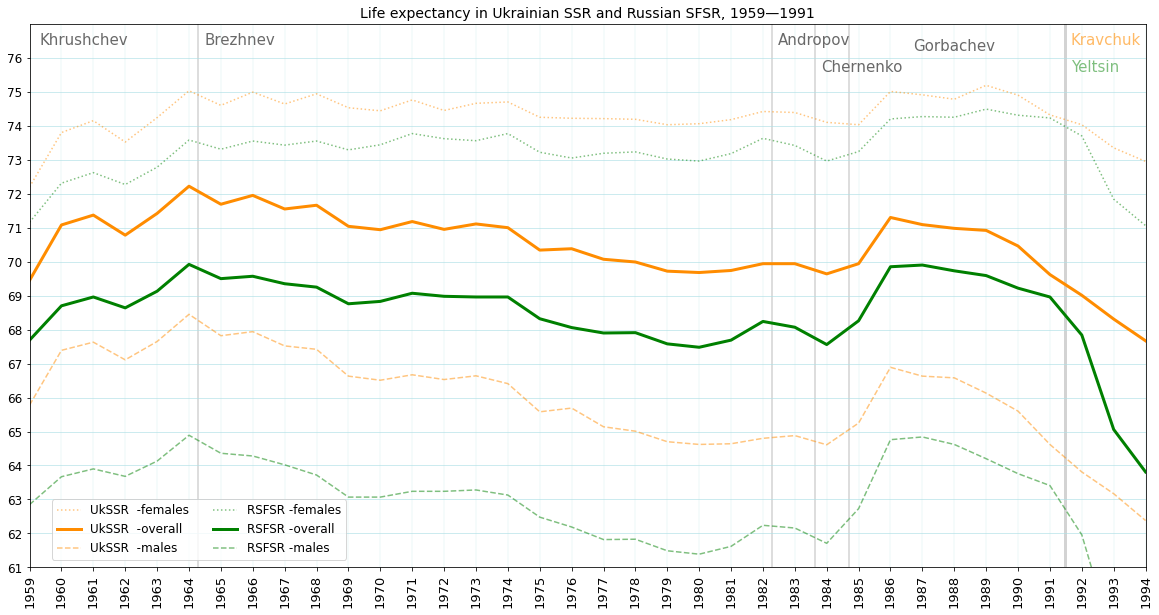

In [10]:
df_ussr = df.loc[:1994]

def place_text(plt, x, y, s, fs=15, c='dimgray', a=1):
    plt.text(x=x-0.3, y=y-0.25, s=s, verticalalignment='top', fontsize=fs, color=c, alpha=a)  # #4B0082   #5F9EA0

# Graph for the USSR period
plt.rcParams['figure.figsize'] = (20, 10)

year_min = df_ussr.index[0]
year_max = df_ussr.index[-1]

plt.title('Life expectancy in Ukrainian SSR and Russian SFSR, 1959—1991', fontsize=14)

for row_name, color_line in zip(['ukr', 'rus'],
                                ['darkorange', 'green']):
    plt.plot(df_ussr.index, df_ussr[row_name+'_f'], linestyle=':', color=color_line, linewidth=1.5, label=dd_to_eng_ussr[row_name+'_f'], alpha=0.5)
    plt.plot(df_ussr.index, df_ussr[row_name+'_o'], linestyle='-', color=color_line, linewidth=3, label=dd_to_eng_ussr[row_name+'_o'])
    plt.plot(df_ussr.index, df_ussr[row_name+'_m'], linestyle='--', color=color_line, linewidth=1.5, label=dd_to_eng_ussr[row_name+'_m'], alpha=0.5)

plt.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
for year in [1964.78415, 1982.77808, 1984.11749, 1985.18904, 1991.98082]:
    plt.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
    
place_text(plt, 1959.6, 77, 'Khrushchev')
place_text(plt, 1964.78415, 77, 'Brezhnev')
place_text(plt, 1982.77808, 77, 'Andropov')
place_text(plt, 1984.11749, 76.2, 'Chernenko')
place_text(plt, 1987, 76.8, 'Gorbachev')
place_text(plt, 1991.98082-0.05, 77, 'Kravchuk', c='darkorange', a=0.6)
place_text(plt, 1991.98082-0.0, 76.2, 'Yeltsin', c='green', a=0.5)
    
    
plt.xlim(year_min, year_max)
plt.grid(axis='x', color='powderblue', linewidth=0.4, alpha=0.6)
plt.grid(axis='y', color='powderblue', linewidth=0.8, alpha=0.8)

labels_x = range(year_min, year_max+1)
labels_y = range(61, 77)
plt.ylim(61, 77)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc=(0.02, 0.014), fontsize=12, ncol=2)
plt.show()

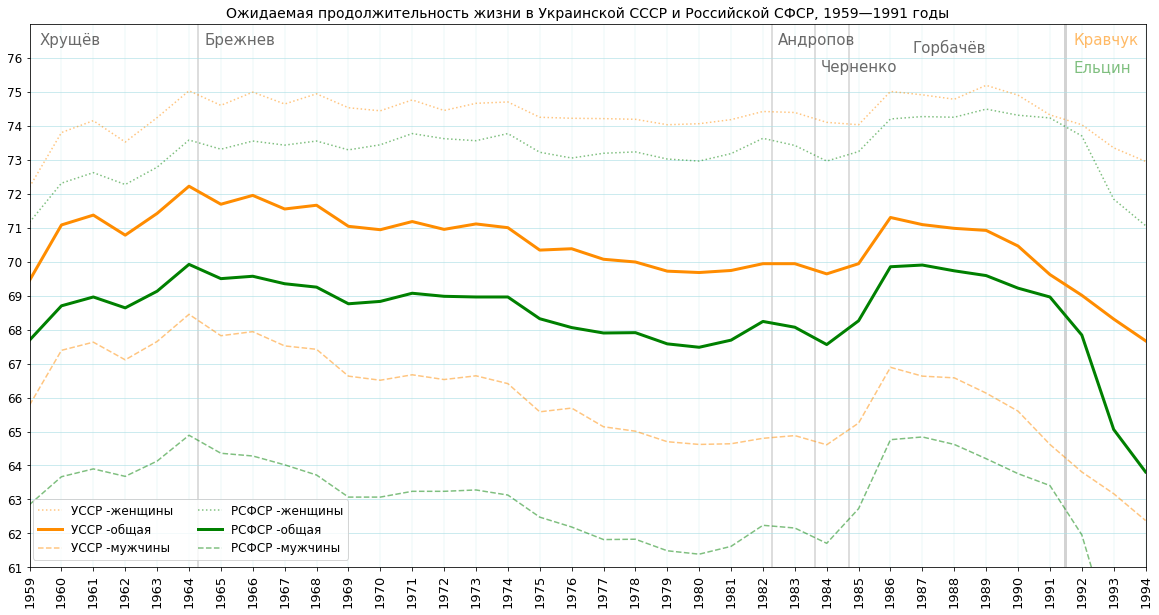

In [11]:
plt.title('Ожидаемая продолжительность жизни в Украинской СССР и Российской СФСР, 1959—1991 годы', fontsize=14)

for row_name, color_line in zip(['ukr', 'rus'],
                                ['darkorange', 'green']):
    plt.plot(df_ussr.index, df_ussr[row_name+'_f'], linestyle=':', color=color_line, linewidth=1.5, label=dd_to_rus_ussr[row_name+'_f'], alpha=0.5)
    plt.plot(df_ussr.index, df_ussr[row_name+'_o'], linestyle='-', color=color_line, linewidth=3, label=dd_to_rus_ussr[row_name+'_o'])
    plt.plot(df_ussr.index, df_ussr[row_name+'_m'], linestyle='--', color=color_line, linewidth=1.5, label=dd_to_rus_ussr[row_name+'_m'], alpha=0.5)

plt.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
for year in [1964.78415, 1982.77808, 1984.11749, 1985.18904, 1991.98082]:
    plt.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
    
place_text(plt, 1959.6, 77, 'Хрущёв')
place_text(plt, 1964.78415, 77, 'Брежнев')
place_text(plt, 1982.77808, 77, 'Андропов')
place_text(plt, 1984.11749, 76.2, 'Черненко')
place_text(plt, 1987, 76.8, 'Горбачёв')
place_text(plt, 1991.98082+0.05, 77, 'Кравчук', c='darkorange', a=0.6)
place_text(plt, 1991.98082+0.05, 76.2, 'Ельцин', c='green', a=0.5)
    
plt.xlim(year_min, year_max)
plt.grid(axis='x', color='powderblue', linewidth=0.4, alpha=0.6)
plt.grid(axis='y', color='powderblue', linewidth=0.8, alpha=0.8)

labels_x = range(year_min, year_max+1)
labels_y = range(61, 77)
plt.ylim(61, 77)
plt.xticks(labels_x, fontsize=13, rotation='vertical')
plt.yticks(labels_y, fontsize=12)
plt.legend(loc=(0.003, 0.014), fontsize=12, ncol=2)
plt.show()